# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [9]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')
limite_por_profissao = df.groupby('Profissão')['Limite_Credito'].mean().reset_index()

fig = px.bar(limite_por_profissao,
             x='Limite_Credito',
             y='Profissão',
             orientation='h',
             title='Média do Limite de Crédito por Profissão',
             labels={'Limite_Credito': 'Limite de Crédito Médio', 'Profissão': 'Profissão'})

fig.show()


Para esses dados escolhi o grafico de barras poís na minha percepção ele facilita a visulição de dados do tipo string em relação aos de tipo numerico. No meu codigo acabei tendo que converte o DataFrame Limite_Credito para tipo numerico para que meu grafico pude-se funcionar

In [20]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')
df['Salário'] = pd.to_numeric(df['Salário'], errors='coerce')
limite_por_profissao = df.groupby('Profissão')['Salário'].mean().reset_index()

fig = px.bar(limite_por_profissao,
             x='Salário',
             y='Profissão',
             orientation='h',
             title='Média do Salário por Profissão',
             labels={'Salário': 'Salário Médio', 'Profissão': 'Profissão'})

fig.show()

Esse da mesma forma que o anterior acreditei aprensentar uma melhor visualização para análise dos dados que eu queria. Também tive que fazer a conversão do DataFrame

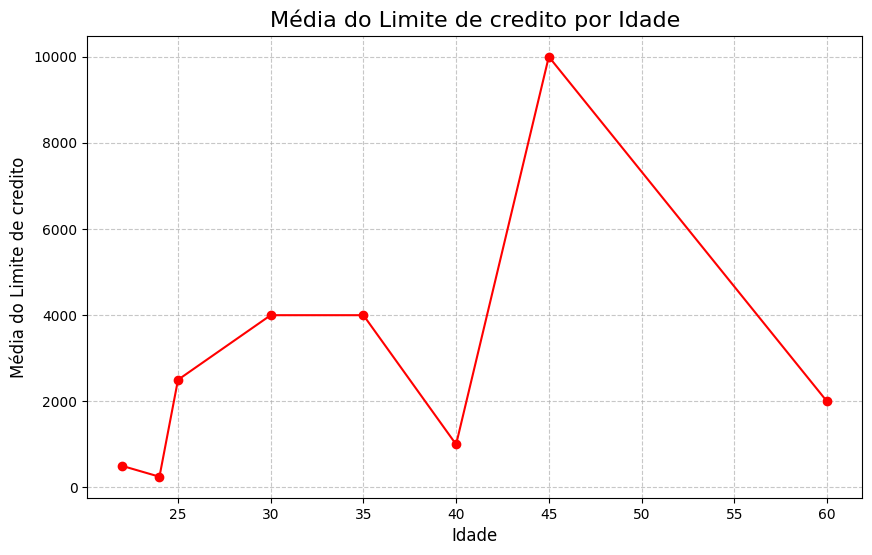

In [11]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')
media_credito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()

media_credito_por_idade = media_credito_por_idade.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(media_credito_por_idade.index, media_credito_por_idade, marker='o', color='red')
plt.title('Média do Limite de credito por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Média do Limite de credito', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Já para dois dados do tipo numerico acredito apresentar uma melhor visualização o grafico de linhas onde podemos comparar pontos de valores distintos. Também realizei a conversão do DataFrame.

Análise:
Durante a análise podemos notar que a profissão médico é onde existe uma maior media do limite de crédito onde a mesma apresenta um dos maiores salários medio o que nos leva a crer que ambas tem uma relação no impulsionamento do crédito, já o maior limite de crédito por idade se apresenta na faixa dos 45 anos. Levando esses dados em conta podemos considerar que os principais impulsionadores do alto limite de crédito são: profissão, salário e idade.